<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/024__Bar_Plots_and_Scatter_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 2/6: EXPLORATORY DATA VISUALIZATION

# MISSION 3: Bar Plots And Scatter Plots

In this mission, we'll be working with a dataset that has no particular order, and learn how to visualize this unordered data using bar plots and scatter plots.


## 1. Recap

In the previous missions in this course, we explored trends in unemployment data using line charts. The unemployment data we worked with had 2 columns:

- `DATE` - monthly time stamp
- `VALUE` - unemployment rate (in percent)

Line charts were an appropriate choice for visualizing this dataset because the rows had a natural ordering to it. Each row reflected information about an event that occurred after the previous row. Changing the order of the rows would make the line chart inaccurate. The lines from one marker to the next helped emphasize the logical connection between the data points.

In this mission, we'll be working with a dataset that has no particular order. Before we explore other plots we can use, let's get familiar with the dataset we'll be working with.

## 2. Introduction to the data

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Fandango_2014.svg/1200px-Fandango_2014.svg.png)

To investigate the potential bias that movie reviews site have, [FiveThirtyEight](https://fivethirtyeight.com/) compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from [Metacritic](https://www.metacritic.com/), [Fandango](https://www.fandango.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), and [IMDB](https://www.imdb.com/) review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site.

FiveThirtyEight compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings. After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published [an article about bias in movie ratings](http://fivethirtyeight.com/features/fandango-movies-ratings/).

We'll be working with the `fandango_scores.csv` file, which can be downloaded from the [FiveThirtEight Github](https://github.com/fivethirtyeight/data/tree/master/fandango) repo or by clicking [this link](https://drive.google.com/file/d/1xILtCzObbTvL99E1ufL7VrPCtX7PC4ro/view?usp=sharing). Here are the columns we'll be working with in this mission:

- `FILM` - film name
- `RT_user_norm` - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
- `Metacritic_user_nom` - average user rating from Metacritic, normalized to a 1 to 5 point scale
- `IMDB_norm` - average user rating from IMDB, normalized to a 1 to 5 point scale
- `Fandango_Ratingvalue` - average user rating from Fandango, normalized to a 1 to 5 point scale
- `Fandango_Stars` - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest `0.5` value). The `Fandango_Ratingvalue` column reflects the true average rating while the `Fandango_Stars` column reflects the displayed, rounded rating.

Let's read in this dataset, which allows us to compare how a movie fared across all 4 review sites.



Instructions:

- Read `fandango_scores.csv` into a Dataframe named `reviews`.
- Select the following columns and assign the resulting Dataframe to norm_reviews:
  - `FILM`
  - `RT_user_norm`
  - `Metacritic_user_nom` (note the misspelling of norm)
  - `IMDB_norm`
  - `Fandango_Ratingvalue`
  - `Fandango_Stars`
- Display the first row in `norm_reviews`

In [1]:
# Import functions from Google modules into Colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Insert file id from Google Drive shareable link:
# https://drive.google.com/file/d/1xILtCzObbTvL99E1ufL7VrPCtX7PC4ro/view?usp=sharing
id = '1xILtCzObbTvL99E1ufL7VrPCtX7PC4ro'

In [3]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fandango_scores.csv')

In [4]:
# Import pandas library and read csv
import pandas as pd
reviews = pd.read_csv('fandango_scores.csv')

In [5]:
# List all columns
reviews.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [6]:
# Assign the instructed columns to a list 
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

In [7]:
# Assign the resulting dataframe
norm_reviews = reviews[cols]

In [8]:
#Display the first row
norm_reviews[:1]

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


In [9]:
# Retrieve info on the dataframe
norm_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   RT_user_norm          146 non-null    float64
 2   Metacritic_user_nom   146 non-null    float64
 3   IMDB_norm             146 non-null    float64
 4   Fandango_Ratingvalue  146 non-null    float64
 5   Fandango_Stars        146 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.0+ KB


## 3. Bar Plot

These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

The `RT_user_norm`, `Metacritic_user_nom`, `IMDB_norm`, and `Fandango_Ratingvalue` columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

![alt text](https://s3.amazonaws.com/dq-content/review_sites_screenshots.png)

If you look at the first row, which lists the average user ratings for **Avengers: Age of Ultron (2015)**, you'll notice that the Fandango ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie. While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of these visualizations is a **bar plot**.

![alt text](https://s3.amazonaws.com/dq-content/vertical_bar_plot.png)

In the bar plot above, the x-axis represented the different ratings and the y-axis represented the actual ratings. An effective bar plot uses categorical values on one axis and numerical values on the other axis. Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot. Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value.

If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a vertical bar plot. A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.

![alt text](https://s3.amazonaws.com/dq-content/horizontal_bar_plot.png)

An effective bar plot uses a consistent width for each bar. This helps keep the visual focus on the heights of the bars when comparing. Let's now learn how to create a vertical bar plot in matplotlib that represents the different user scores for **Avengers: Age of Ultron (2015)**.

## 4. Creating Bars

When we generated line charts, we passed in the data to `pyplot.plot()` and matplotlib took care of the rest. Because the markers and lines in a line chart correspond directly with x-axis and y-axis coordinates, all matplotlib needed was the data we wanted plotted. To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. Here's a diagram that shows the various values we need to specify:
![alt text](https://s3.amazonaws.com/dq-content/matplotlib_barplot_positioning.png)

We'll focus on positioning the bars on the x-axis in this step and on positioning the x-axis labels in the next step. We can generate a vertical bar plot using either [pyplot.bar()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) or [Axes.bar()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.bar). We'll use `Axes.bar()` so we can extensively customize the bar plot more easily. We can use [pyplot.subplots()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to first generate a single subplot and return both the Figure and Axes object. This is a shortcut from the technique we used in the previous mission:
```
fig, ax = plt.subplots()
```
The `Axes.bar()` method has 2 required parameters, `left` and `height`. We use the `left` parameter to specify the x coordinates of the left sides of the bar (marked in blue on the above image) (Note that recent versions of Matplotlib use a modified syntax, substituting the parameter `x` for the parameter `left`). We use the `height` parameter to specify the height of each bar. Both of these parameters accept a list-like object.

The [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function returns evenly spaced values. We use `arange()` to generate the positions of the `left` side of our bars. This function requires a parameter that specifies the number of values we want to generate. We'll also want to add space between our bars for better readability:

```
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
from numpy import arange
bar_positions = arange(5) + 0.75

# Heights of the bars, in this case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values

ax.bar(bar_positions, bar_heights)
```
We can also use the `width` parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to `0.8` by default. The following code sets the `width` parameter to `1.5`:


```
ax.bar(bar_positions, bar_heights, 1.5)
```





Instructions:

- Create a single subplot and assign the returned Figure object to `fig` and the returned Axes object to `ax`.
- Generate a bar plot with:
  - `left` set to `bar_positions`
  - `height` set to `bar_heights`
  - `width` set to `0.5`
- Use `plt.show()` to display the bar plot.

In [12]:
# Import pyplot library and arrange function
import matplotlib.pyplot as plt
from numpy import arange

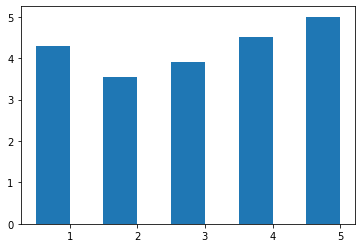

In [14]:
# Define the number of columns
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

## 5. Aligning Axis Ticks And Labels

## 6. Horizontal Bar Plot

## 7. Scatter plot

## 8. Switching axes

## 9. Benchmarking correlation


---

From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. In the next mission, we'll learn about two types of plots that help us understand distributions of values.

